# Importando bibliotecas

In [228]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Importar os dados

In [229]:
data = pd.read_csv('Teste Técnico - DS\\Teste Te╠ücnico - DS\\ofertas_relampago.csv')

In [230]:
data.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


# Análise Exploratória dos Dados (EDA)

## Análise Geral

Análise geral das colunas numéricas (média, mínimo, máximo, etc.) e categóricas (valores únicos e frequências), além dos dados faltantes.

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

Temos 13 colunas com valores numéricos e categóricos e 48746 linhas.\
Já podemos perceber dados faltantes nas colunas SOLD_AMOUNT, SOLD_QUANTITY e ORIGIN.\
Vamos verificar as quantidades abaixo.

In [232]:
data.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

Os dados faltantes chegam a 76% na coluna ORIGIN.

In [233]:
print('Porcentagem de dados faltantes')
data.isnull().sum()/data.shape[0]*100

Porcentagem de dados faltantes


OFFER_START_DATE              0.000000
OFFER_START_DTTM              0.000000
OFFER_FINISH_DTTM             0.000000
OFFER_TYPE                    0.000000
INVOLVED_STOCK                0.000000
REMAINING_STOCK_AFTER_END     0.000000
SOLD_AMOUNT                  49.577401
SOLD_QUANTITY                49.577401
ORIGIN                       76.785788
SHIPPING_PAYMENT_TYPE         0.000000
DOM_DOMAIN_AGG1               0.000000
VERTICAL                      0.000000
DOMAIN_ID                     0.000000
dtype: float64

Onde ORIGIN não é nula, existe apenas valor A.

In [234]:
data[~data.ORIGIN.isnull()]['ORIGIN'].value_counts()

A    11316
Name: ORIGIN, dtype: int64

A média dos estoques dos produtos nas ofertas relâmpago é de aproximadamente 35, sendo que o mínimo é de 1 e o máximo é de 9000, apresentando uma grande variância.\
Em média, o estoque após o fim da oferta relâmpago é de 30, sendo que em comparação à média do estoque, 5 produtos são vendidos em média. O valor mínimo de estoque após a oferta é de -192, provavelmente indicando que a demanda dos clientes foi maior do que o estoque disponível. Também, o valor máximo de estoque faltante é de 8635, que, em comparação com o máximo de estoque, mostra que alguns produtos que tinham bastante estoque disponível não foram tão comprados.\
O valor médio vendido (supondo a moeda em real R$) é de R$51, indo de R$0,28 a R$4836. \
A quantidade de produtos vendidas foi de 10 em média, variando de 1 a 1646.

In [235]:
data.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


O único tipo de oferta disponível nestes dados é o lightning_deal.

In [236]:
data.OFFER_TYPE.value_counts()

lightning_deal    48746
Name: OFFER_TYPE, dtype: int64

O tipo de frete mais predominante é o de frete grátis, porém aproximadamente 45% das linhas contém dados 'none'.\
Pode-se supor que os 'nones' se tratam de dados não coletados por alguma razão ou qualquer outro método que não seja o frete grátis, devendo ser validado conforme a origem dos dados e seu processo de armazenamento.

In [237]:
data.SHIPPING_PAYMENT_TYPE.value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [238]:
data.SHIPPING_PAYMENT_TYPE.value_counts()['none']/data.shape[0]

0.4531243589217577

Os produtos de casa e decoração são os de maior frequência na oferta relâmpago, seguidos por acessórios de vesturário e vestuário.

In [239]:
data.DOM_DOMAIN_AGG1.value_counts()

HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS                       193
B

Os setores mais presentes são de vestuário e acessórios, casa e indústria, e acessórios e dispositivos de comunicação.

In [240]:
data.VERTICAL.value_counts()

APP & SPORTS       13241
HOME & INDUSTRY    11011
CE                  8629
BEAUTY & HEALTH     7150
CPG                 2714
T & B               2624
ACC                 2573
ENTERTAINMENT        525
OTHERS               279
Name: VERTICAL, dtype: int64

As áreas de domínio mais comuns são a cirúrgica e máscaras industriais, fones de ouvido e fitas de led.

In [241]:
data.DOMAIN_ID.value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: DOMAIN_ID, Length: 1266, dtype: int64

Vemos que as variáveis mais correlacionadas são as relacionadas ao estoque e quantidade e valor das vendas.

<AxesSubplot:>

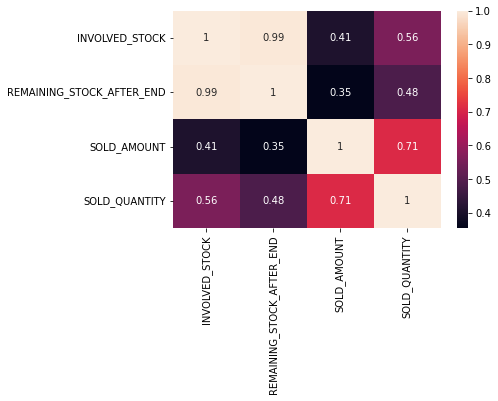

In [242]:
sns.heatmap(data.corr(), annot=True)

## Análise Temporal

As colunas com dados temporais são: 'OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM'. Podemos analisar questões temporais como: duração da oferta, datas em que houve mais e menos vendas, em qual período produtos de certas categorias foram mais presentes nas ofertas, a variação das vendas com o tempo, etc.

In [243]:
data.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

Primeiro precisamos converter as colunas para o formato date time.

In [244]:
data['OFFER_START_DATE'] = pd.to_datetime(data['OFFER_START_DATE'])
data['OFFER_START_DTTM'] = pd.to_datetime(data['OFFER_START_DTTM'])
data['OFFER_FINISH_DTTM'] = pd.to_datetime(data['OFFER_FINISH_DTTM'])

Verificando o tipo das colunas.

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

Criando coluna de duração da oferta.

In [246]:
def days_between(row):
    d1 = row['OFFER_START_DTTM']
    d2 = row['OFFER_FINISH_DTTM']
    return (d2 - d1).seconds

In [247]:
data['OFFER_DURATION_SECONDS'] = data.apply(days_between,axis=1)

In [248]:
data['OFFER_DURATION_SECONDS'].describe()

count    48746.000000
mean     20542.950088
std       7433.904340
min          0.000000
25%      21600.000000
50%      21602.000000
75%      21616.000000
max      56229.000000
Name: OFFER_DURATION_SECONDS, dtype: float64

In [249]:
data['OFFER_DURATION_HOURS'] = data['OFFER_DURATION_SECONDS']/3600

Em média, as ofertas duram 5.7 horas, chegando no máximo em 15.6 horas.\
Nota-se que o mínimo de horas são de 0, então algumas ofertas estão com tempo de início e fim iguais.

In [250]:
data['OFFER_DURATION_HOURS'].describe()

count    48746.000000
mean         5.706375
std          2.064973
min          0.000000
25%          6.000000
50%          6.000556
75%          6.004444
max         15.619167
Name: OFFER_DURATION_HOURS, dtype: float64

Existem 1314 ofertas com tempo de duração igual a 0. Como é de se esperar também, o estoque não teve alteração, já que não ocorreram vendas.

In [251]:
data[data.OFFER_DURATION_HOURS==0]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION_SECONDS,OFFER_DURATION_HOURS
25,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 13:00:00+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-SHOWER_HEADS,0,0.0
72,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 07:00:00+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-BOOKS,0,0.0
90,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,lightning_deal,3,3,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,0,0.0
98,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,lightning_deal,3,3,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,0,0.0
145,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 07:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-BOOTS_AND_BOOTIES,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 13:00:00+00:00,lightning_deal,8,8,NaN,NaN,NaN,none,APPAREL,APP & SPORTS,MLM-UNDERPANTS,0,0.0
48647,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-UNDERPANTS,0,0.0
48700,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 07:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,none,ELECTRONICS,CE,MLM-PLAGUES_ULTRASONIC_REPELLENTS,0,0.0
48709,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 07:00:00+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-PILLOWS,0,0.0


Todas as ofertas com tempo de duração igual a 0, como é de se esperar, apresetam SOLD_AMOUNT e SOLD_QUANTITY nulos.\
Vale notar que existem campos nulos de ambas as colunas para ofertas com duração superior a 0 também.

In [252]:
data[data.OFFER_DURATION_HOURS==0].isna().sum()

OFFER_START_DATE                0
OFFER_START_DTTM                0
OFFER_FINISH_DTTM               0
OFFER_TYPE                      0
INVOLVED_STOCK                  0
REMAINING_STOCK_AFTER_END       0
SOLD_AMOUNT                  1314
SOLD_QUANTITY                1314
ORIGIN                       1107
SHIPPING_PAYMENT_TYPE           0
DOM_DOMAIN_AGG1                 0
VERTICAL                        0
DOMAIN_ID                       0
OFFER_DURATION_SECONDS          0
OFFER_DURATION_HOURS            0
dtype: int64

Notamos que a série temporal em relação aos valores vendidos não apresenta um padrão específico, tendo os picos mais notáveis em 2021-07-01 e entre 2021-06-15 e 2021-06-22.

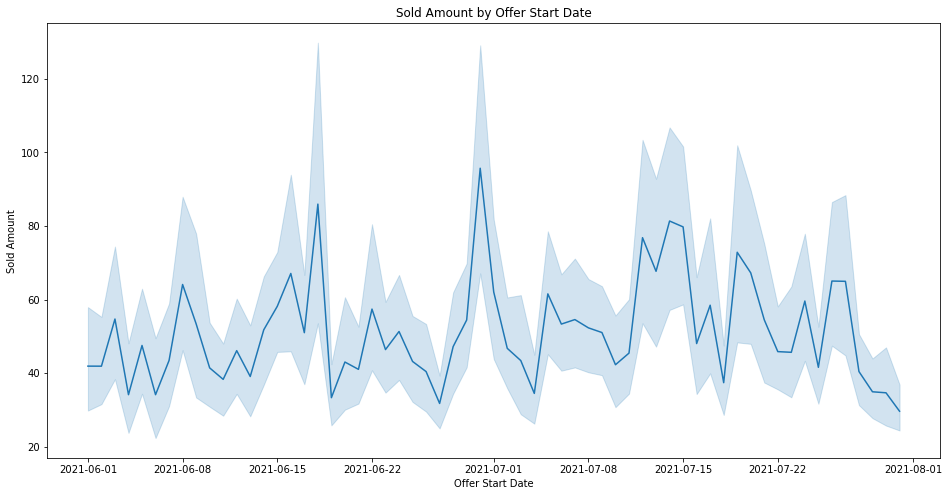

In [253]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'], y=data['SOLD_AMOUNT'])
plt.title('Sold Amount by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Sold Amount')
plt.show()

Em relação aos dias da semana, Segunda (weekday=0) é o que tem em média mais valor em vendas, decaindo no decorrer na semana.

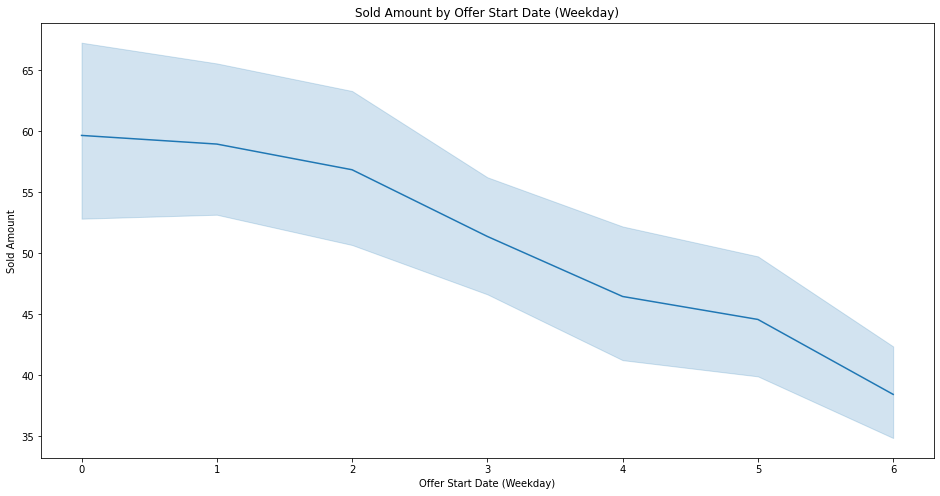

In [254]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'].dt.weekday, y=data['SOLD_AMOUNT'])
plt.title('Sold Amount by Offer Start Date (Weekday)')
plt.xlabel('Offer Start Date (Weekday)')
plt.ylabel('Sold Amount')
plt.show()

Vamos criar um segundo dataframe apenas com os dados das ofertas que duraram pelo menos 1 hora para avaliar se ocorre alguma mudança na série temporal relacionada ao estoque, já que vimos que o estoque se manteve para as ofertas com 0 horas.

In [255]:
data_without_0_hours = data[data.OFFER_DURATION_HOURS>1.0]
data_without_0_hours.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_DURATION_SECONDS,OFFER_DURATION_HOURS
count,44644.000000,44644.000000,24361.000000,24361.000000,44644.000000,44644.000000
mean,36.662866,31.866320,51.371175,10.857313,22418.555752,6.227377
std,215.103496,203.638266,175.949002,45.667234,4301.951898,1.194987
min,1.000000,-192.000000,0.280000,1.000000,3606.000000,1.001667
25%,5.000000,4.000000,5.710000,1.000000,21601.000000,6.000278
50%,10.000000,7.000000,12.350000,3.000000,21603.000000,6.000833
75%,15.000000,15.000000,30.860000,6.000000,21639.000000,6.010833
max,9000.000000,8635.000000,4836.570000,1646.000000,56229.000000,15.619167


Série temporal sobre o estoque considerando todos os dados.\
Vemos que, conforme esperado, o estoque restante em média não se difere muito do estoque disponível.

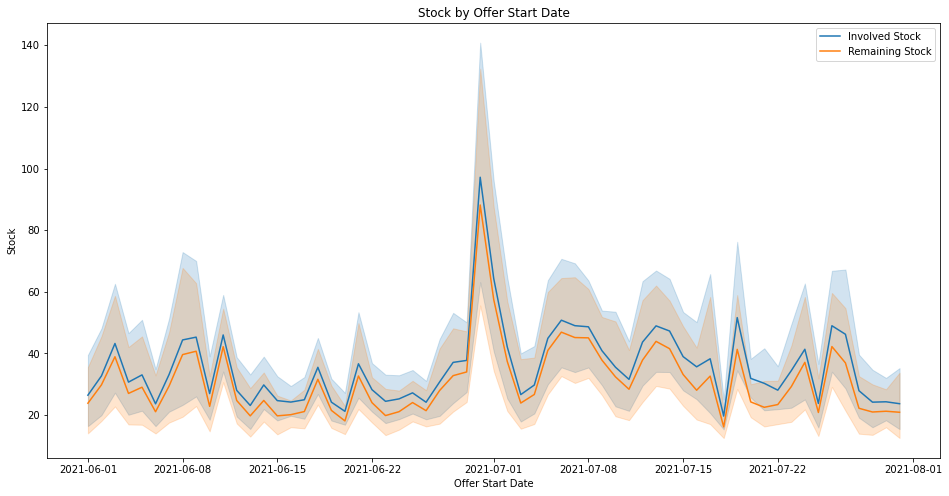

In [256]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'], y=data['INVOLVED_STOCK'], label = 'Involved Stock')
sns.lineplot(x=data['OFFER_START_DATE'], y=data['REMAINING_STOCK_AFTER_END'], label = 'Remaining Stock')
plt.title('Stock by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Stock')
plt.legend()
plt.show()

Usando o dataframe com ofertas que duraram mais de 1 hora, é notável que o comportamento da série não é afetado.

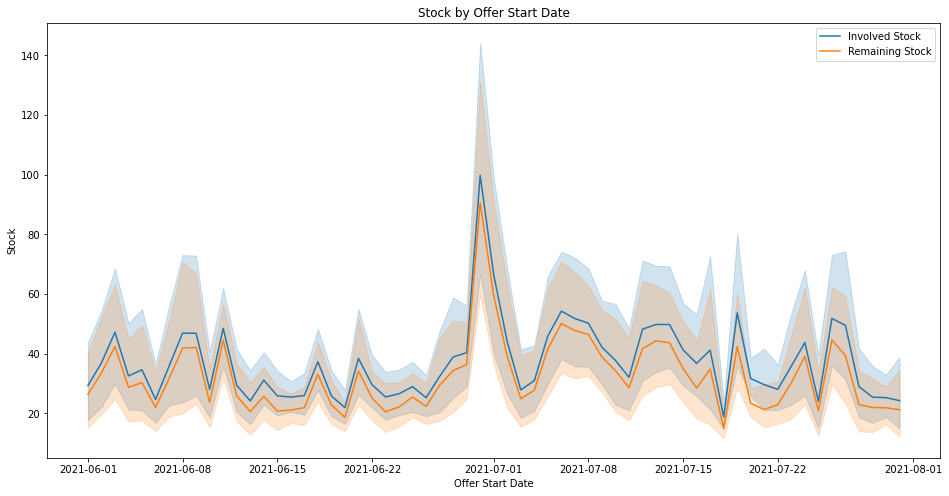

In [257]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data_without_0_hours['OFFER_START_DATE'], y=data_without_0_hours['INVOLVED_STOCK'], label = 'Involved Stock')
sns.lineplot(x=data_without_0_hours['OFFER_START_DATE'], y=data_without_0_hours['REMAINING_STOCK_AFTER_END'], label = 'Remaining Stock')
plt.title('Stock by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Stock')
plt.legend()
plt.show()

Já que a diferença entre o INVOLVED_STOCK e REMAINING_STOCK_AFTER_END é igual a coluna SOLD_QUANTITY, temos uma série similar a anterior em relação às quantidades vendidas. Em média, mais produtos foram vendidos em 2021-07-01.

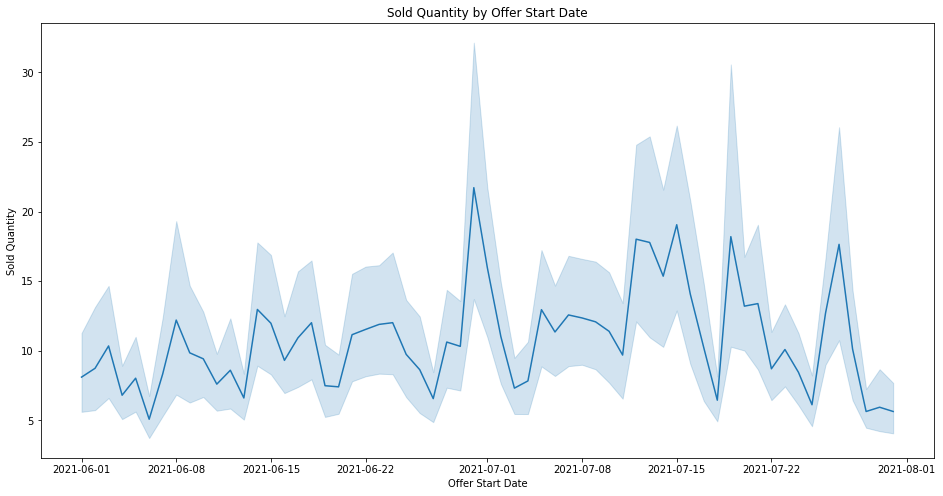

In [258]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'], y=data['SOLD_QUANTITY'])
plt.title('Sold Quantity by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Sold Quantity')
plt.show()

É visível que, em média, em 2021-07-01, o tempo de duração da oferta foi o máximo em relação aos outros períodos, podendo justificar também porque no mesmo período ocorreu maiores vendas. Se comparado com o gráfico de SOLD_AMOUNT e SOLD_QUANTITY, eles seguem o mesmo padrão. Portanto, um maior tempo de ofertas resulta em mais vendas.

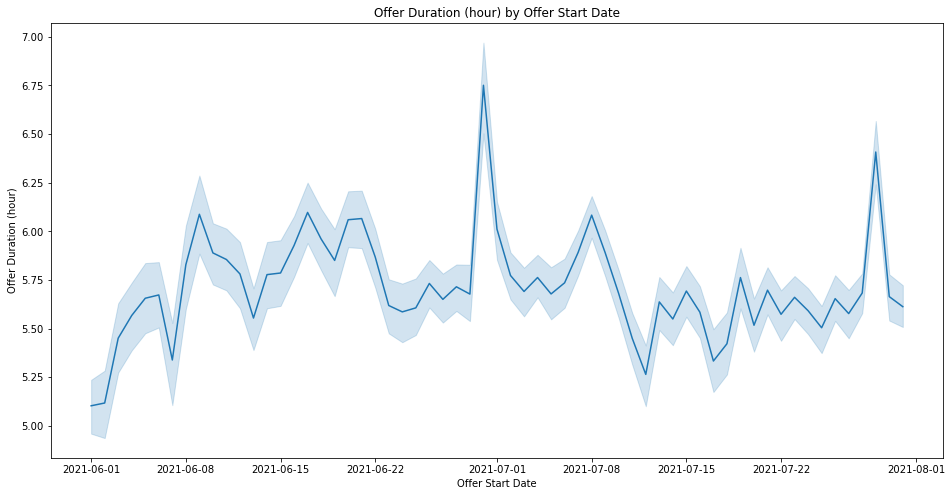

In [259]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'], y=data['OFFER_DURATION_HOURS'])
plt.title('Offer Duration (hour) by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Offer Duration (hour)')
plt.show()

O dia da semana que teve maior duração em média de ofertas foi quinta-feira (weekday=3), sendo que é o mesmo dia da semana que 2021-07-01.

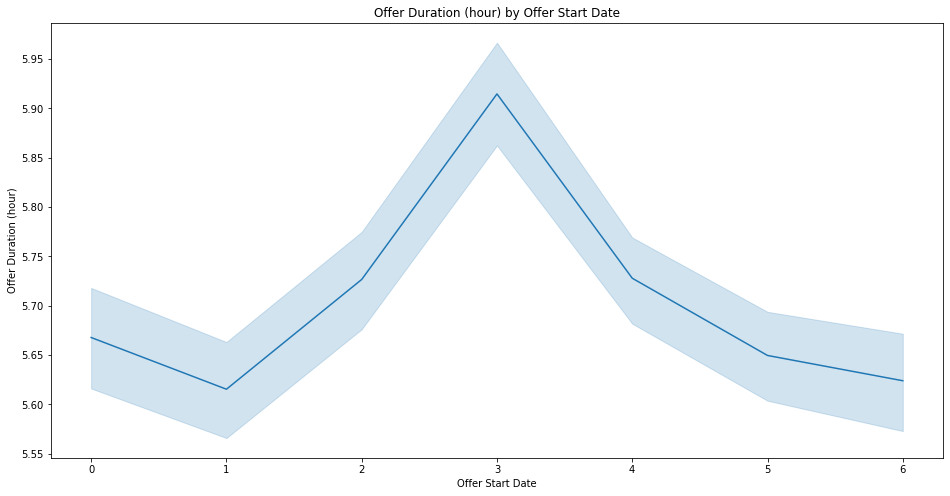

In [260]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['OFFER_START_DATE'].dt.weekday, y=data['OFFER_DURATION_HOURS'])
plt.title('Offer Duration (hour) by Offer Start Date')
plt.xlabel('Offer Start Date')
plt.ylabel('Offer Duration (hour)')
plt.show()

## Análise Agrupamento

In [261]:
data.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_DURATION_SECONDS',
       'OFFER_DURATION_HOURS'],
      dtype='object')

Agrupando os dados pelo campo DOMAIN_ID relacionado às áreas dos produtos.

In [262]:
df_2 = data.groupby('DOMAIN_ID').sum()
df_2.reset_index(inplace=True)

In [263]:
df_2

,DOMAIN_ID,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_DURATION_SECONDS,OFFER_DURATION_HOURS
0,MLM-3D_PENS,15,15,0.00,0.0,32,0.008889
1,MLM-3D_PRINTERS,5,5,0.00,0.0,21606,6.001667
2,MLM-3D_PRINTER_FILAMENTS,5,5,0.00,0.0,21602,6.000556
3,MLM-3D_PRINTER_NOZZLES,10,10,0.00,0.0,21600,6.000000
4,MLM-ABDOMINAL_TONING_BELTS,15,15,0.00,0.0,21600,6.000000
...,...,...,...,...,...,...,...
1261,MLM-WRENCH_SETS,17,7,70.89,10.0,54027,15.007500
1262,MLM-WRISTWATCHES,10541,9924,4945.75,618.0,9466795,2629.665278
1263,MLM-WRISTWATCH_SCREEN_PROTECTORS,1352,1276,175.29,77.0,1453107,403.640833
1264,MLM-XYLOPHONES_AND_METALLOPHONES,8,8,0.00,0.0,28800,8.000000


Coletando Top 5 valores de cada das colunas INVOLVED_STOCK, SOLD_AMOUNT, SOLD_QUANTITY, REMAINING_STOCK_AFTER_END e OFFER_DURATION_HOURS para análise em relação ao DOMAIN_ID.

In [264]:
involved_stock_max = df_2.sort_values(by='INVOLVED_STOCK', ascending=False).head()
involved_stock_min = df_2.sort_values(by='INVOLVED_STOCK', ascending=True).head()

sold_amount_max = df_2.sort_values(by='SOLD_AMOUNT', ascending=False).head()
sold_amount_min = df_2.sort_values(by='SOLD_AMOUNT', ascending=True).head()

sold_quantity_max = df_2.sort_values(by='SOLD_QUANTITY', ascending=False).head()
sold_quantity_min = df_2.sort_values(by='SOLD_QUANTITY', ascending=True).head()

remaining_stock_max = df_2.sort_values(by='REMAINING_STOCK_AFTER_END', ascending=False).head()
remaining_stock_min = df_2.sort_values(by='REMAINING_STOCK_AFTER_END', ascending=True).head()

duration_hours_max = df_2.sort_values(by='OFFER_DURATION_HOURS', ascending=False).head()
duration_hours_min = df_2.sort_values(by='OFFER_DURATION_HOURS', ascending=True).head()

A categoria com maior estoque para ofertas foi a de máscaras cirúrgicas e industriais.

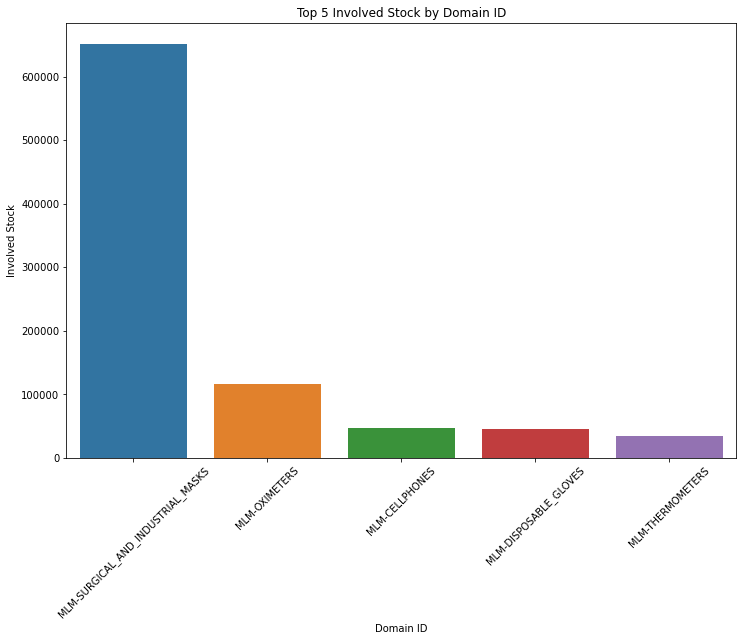

In [265]:
plt.figure(figsize=(12,8))
sns.barplot(x = involved_stock_max['DOMAIN_ID'], y= involved_stock_max['INVOLVED_STOCK'])
plt.title('Top 5 Involved Stock by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Involved Stock')
plt.xticks(rotation = 45)
plt.show()

As áreas com menores estoques estão abaixo.

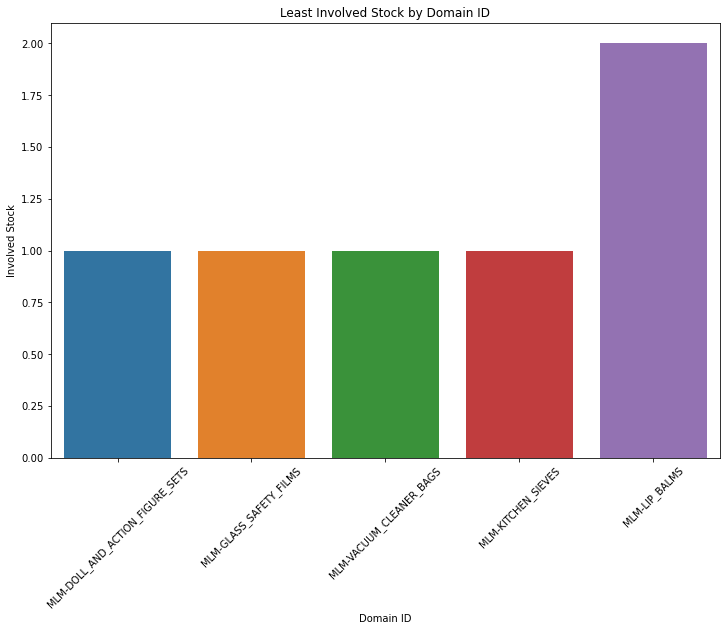

In [266]:
plt.figure(figsize=(12,8))
sns.barplot(x = involved_stock_min['DOMAIN_ID'], y= involved_stock_min['INVOLVED_STOCK'])
plt.title('Least Involved Stock by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Involved Stock')
plt.xticks(rotation = 45)
plt.show()

Em relação aos com maiores valores vendidos.

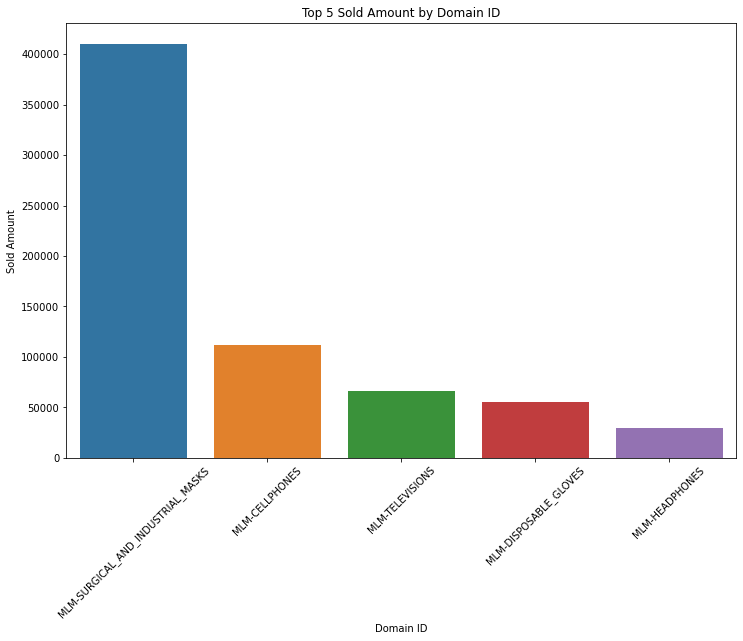

In [267]:
plt.figure(figsize=(12,8))
sns.barplot(x = sold_amount_max['DOMAIN_ID'], y= sold_amount_max['SOLD_AMOUNT'])
plt.title('Top 5 Sold Amount by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Sold Amount')
plt.xticks(rotation = 45)
plt.show()

E os menores valores vendidos.

In [268]:
sold_amount_min[['DOMAIN_ID','SOLD_AMOUNT']]

,DOMAIN_ID,SOLD_AMOUNT
0,MLM-3D_PENS,0.0
662,MLM-JUICES,0.0
659,MLM-JEWELRY_TOOLS,0.0
655,MLM-JEWELRY_AND_WATCHES,0.0
654,MLM-JEWELRY,0.0


Áreas com mais quantidades vendidas.

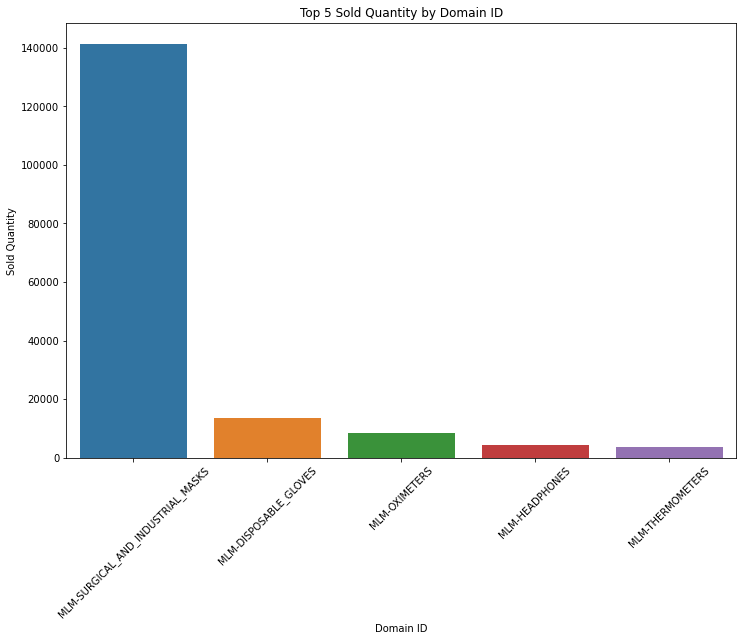

In [269]:
plt.figure(figsize=(12,8))
sns.barplot(x = sold_quantity_max['DOMAIN_ID'], y= sold_quantity_max['SOLD_QUANTITY'])
plt.title('Top 5 Sold Quantity by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Sold Quantity')
plt.xticks(rotation = 45)
plt.show()

E com menos quantidades vendidas.

In [270]:
sold_quantity_min[['DOMAIN_ID','SOLD_AMOUNT']]

,DOMAIN_ID,SOLD_AMOUNT
0,MLM-3D_PENS,0.0
662,MLM-JUICES,0.0
659,MLM-JEWELRY_TOOLS,0.0
655,MLM-JEWELRY_AND_WATCHES,0.0
654,MLM-JEWELRY,0.0


Áreas com maiores estoques após o término da oferta.

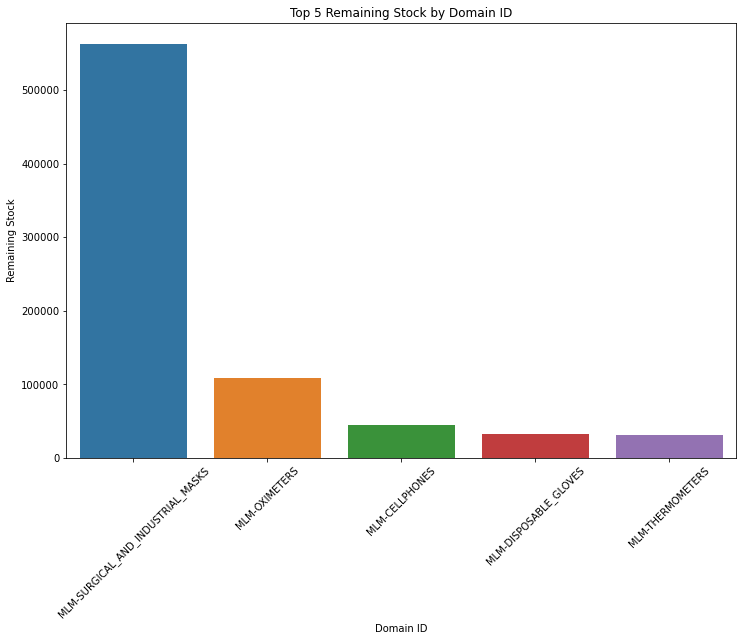

In [271]:
plt.figure(figsize=(12,8))
sns.barplot(x = remaining_stock_max['DOMAIN_ID'], y= remaining_stock_max['REMAINING_STOCK_AFTER_END'])
plt.title('Top 5 Remaining Stock by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Remaining Stock')
plt.xticks(rotation = 45)
plt.show()

E os menores estoque após a oferta terminar. Temos que sabonetes de lavar roupa ficaram com estoque -12, ou seja, excederam seu estoque em 12.

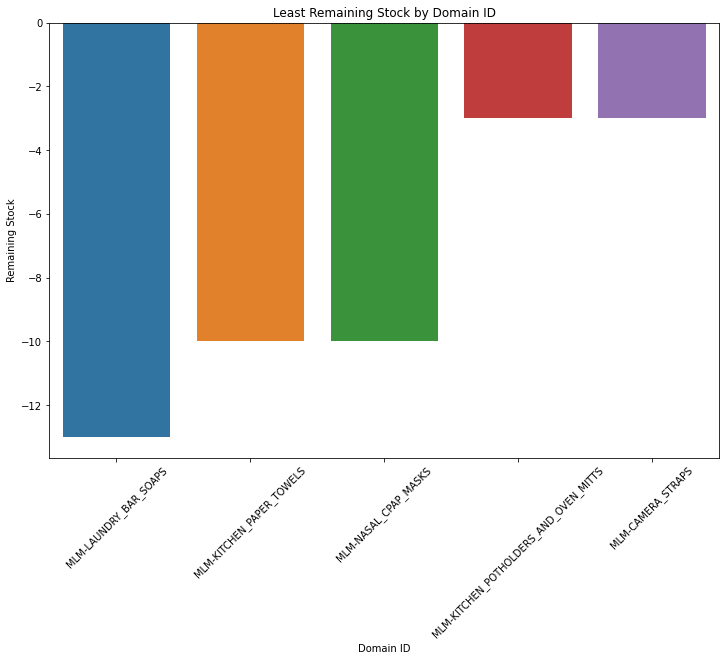

In [272]:
plt.figure(figsize=(12,8))
sns.barplot(x = remaining_stock_min['DOMAIN_ID'], y= remaining_stock_min['REMAINING_STOCK_AFTER_END'])
plt.title('Least Remaining Stock by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Remaining Stock')
plt.xticks(rotation = 45)
plt.show()

A duração das ofertas por área dos produtos.

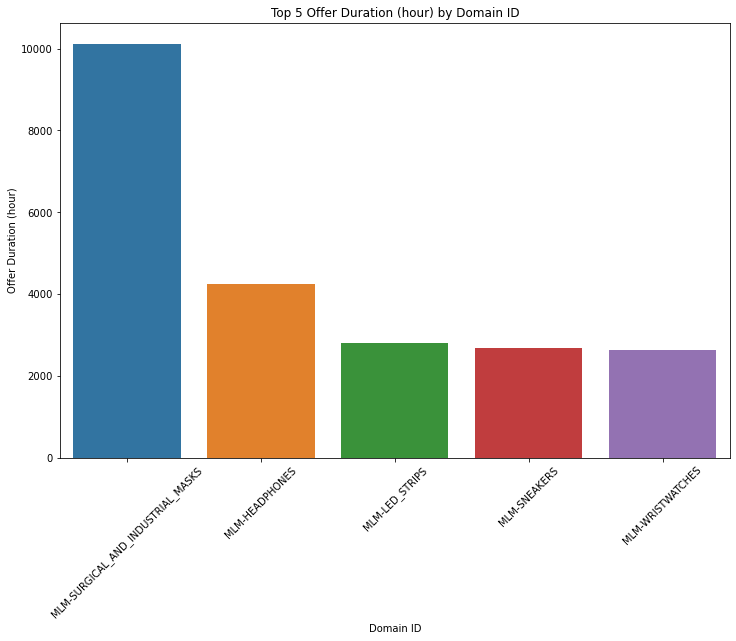

In [273]:
plt.figure(figsize=(12,8))
sns.barplot(x = duration_hours_max['DOMAIN_ID'], y= duration_hours_max['OFFER_DURATION_HOURS'])
plt.title('Top 5 Offer Duration (hour) by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Offer Duration (hour)')
plt.xticks(rotation = 45)
plt.show()

As áreas de produtos com menos tempo de oferta. Vemos que algumas áreas não tiveram nenhuma hora de oferta.

In [274]:
duration_hours_min[['DOMAIN_ID','OFFER_DURATION_HOURS']]

,DOMAIN_ID,OFFER_DURATION_HOURS
822,MLM-MULTI_TOOL_KNIVES,0.0
478,MLM-FEMALE_URINATION_DEVICES,0.0
854,MLM-ORAL_IRRIGATORS,0.0
254,MLM-CEREALS,0.0
268,MLM-CLARINETS,0.0
